In [1]:
!pip install paddleocr
!python -m pip install paddlepaddle-gpu==2.5.0.post118 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import paddleocr
from paddleocr import PaddleOCR
from datetime import datetime
import os
import warnings
import numpy as np
from PIL import Image
warnings.filterwarnings('ignore')

In [34]:
def load_image_with_orientation(image_path):
    img = Image.open(image_path)

    # Check if the image has Exif data with orientation information
    if hasattr(img, '_getexif'):
        exif = img._getexif()
        if exif is not None:
            orientation = exif.get(0x0112)
            # Orientation values: 1, 3, 6, 8 (See Exif documentation for details)
            if orientation == 3:
                img = img.rotate(180, expand=True)
            elif orientation == 6:
                img = img.rotate(270, expand=True)
            elif orientation == 8:
                img = img.rotate(90, expand=True)

    return img

In [19]:
# ocr = PaddleOCR(lang="en", rec_model_type='en', use_gpu=False, log_level='OFF',
#                 rec_model_path='./models/en_mobile_lite_v2.0.1.paddle')
ocr = PaddleOCR(lang="en", rec_model_type='en', use_gpu=False, log_level='OFF',use_rec=False)

[2023/07/20 10:52:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

In [22]:
t1 = datetime.now()
result = ocr.ocr('/content/IMG-20230708-WA0009.jpg', rec=False)
t2 = datetime.now()
print(t2-t1)
words = []

[2023/07/20 11:03:14] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
0:00:00.432837
[[446.0, 430.0], [659.0, 420.0], [661.0, 460.0], [448.0, 470.0]]
[[726.0, 419.0], [921.0, 415.0], [922.0, 455.0], [727.0, 459.0]]
[[446.0, 368.0], [866.0, 356.0], [867.0, 396.0], [448.0, 408.0]]
[[445.0, 312.0], [666.0, 304.0], [667.0, 340.0], [446.0, 348.0]]
[[441.0, 251.0], [622.0, 245.0], [623.0, 285.0], [442.0, 291.0]]
[[438.0, 192.0], [594.0, 187.0], [595.0, 227.0], [440.0, 232.0]]
[[437.0, 133.0], [731.0, 126.0], [732.0, 164.0], [438.0, 171.0]]


In [28]:
print(result)

[[[[446.0, 430.0], [659.0, 420.0], [661.0, 460.0], [448.0, 470.0]], [[726.0, 419.0], [921.0, 415.0], [922.0, 455.0], [727.0, 459.0]], [[446.0, 368.0], [866.0, 356.0], [867.0, 396.0], [448.0, 408.0]], [[445.0, 312.0], [666.0, 304.0], [667.0, 340.0], [446.0, 348.0]], [[441.0, 251.0], [622.0, 245.0], [623.0, 285.0], [442.0, 291.0]], [[438.0, 192.0], [594.0, 187.0], [595.0, 227.0], [440.0, 232.0]], [[437.0, 133.0], [731.0, 126.0], [732.0, 164.0], [438.0, 171.0]]]]


In [33]:
t1 = datetime.now()
result = ocr.ocr('/content/IMG-20230708-WA0009.jpg')
t2 = datetime.now()
print(t2-t1)
words = []

for line in result:
    for word_info in line:
        print(word_info[1],word_info[0])

[2023/07/20 11:10:36] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/07/20 11:10:36] ppocr DEBUG: dt_boxes num : 7, elapse : 0.40090179443359375
[2023/07/20 11:10:37] ppocr DEBUG: rec_res num  : 7, elapse : 0.5452582836151123
0:00:00.973957
('SHIPPING MARK:', 0.9427067637443542) [[437.0, 133.0], [731.0, 126.0], [732.0, 164.0], [438.0, 171.0]]
('CODE NO', 0.9671997427940369) [[438.0, 192.0], [594.0, 187.0], [595.0, 227.0], [440.0, 232.0]]
('MFG.DATE', 0.9864611029624939) [[441.0, 251.0], [622.0, 245.0], [623.0, 285.0], [442.0, 291.0]]
('EXPIRY DATE', 0.964809000492096) [[445.0, 312.0], [666.0, 304.0], [667.0, 340.0], [446.0, 348.0]]
('GROSS WEIGHT :10.8 kg', 0.9120263457298279) [[446.0, 368.0], [866.0, 356.0], [867.0, 396.0], [448.0, 408.0]]
(':20X500g', 0.9371845722198486) [[726.0, 419.0], [921.0, 415.0], [922.0, 455.0], [727.0, 459.0]]
('NET WEIGHT', 0.9505828619003296) [[446.0, 430.0], [659.0, 420.0

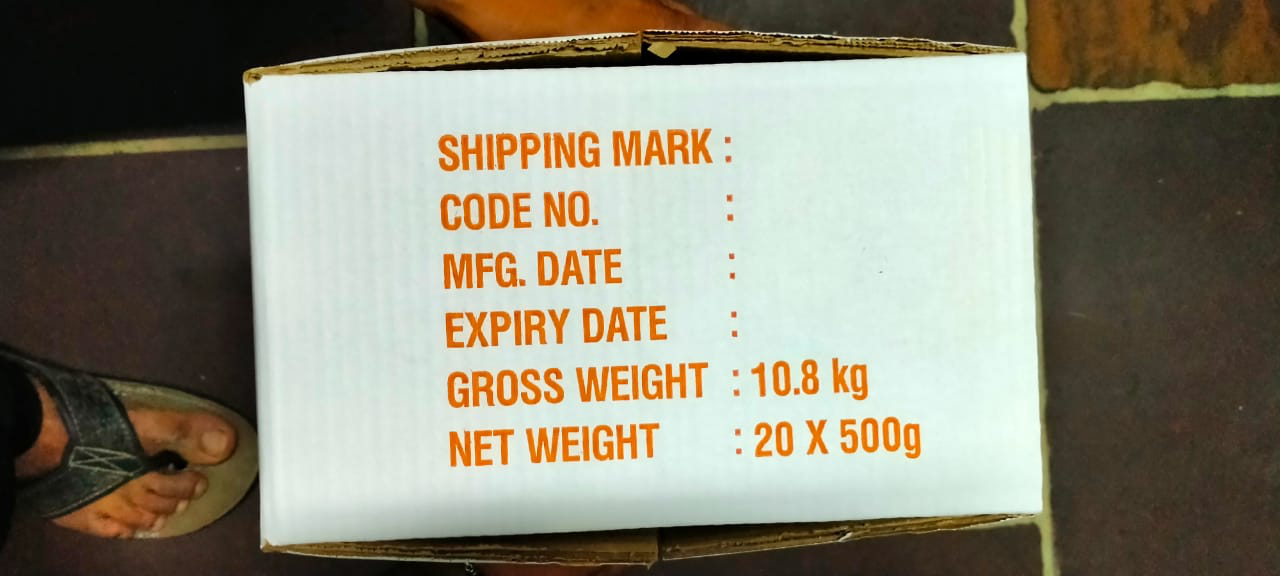

In [62]:
image_path = '/content/IMG-20230708-WA0009.jpg'
img = load_image_with_orientation(image_path)
img.show()

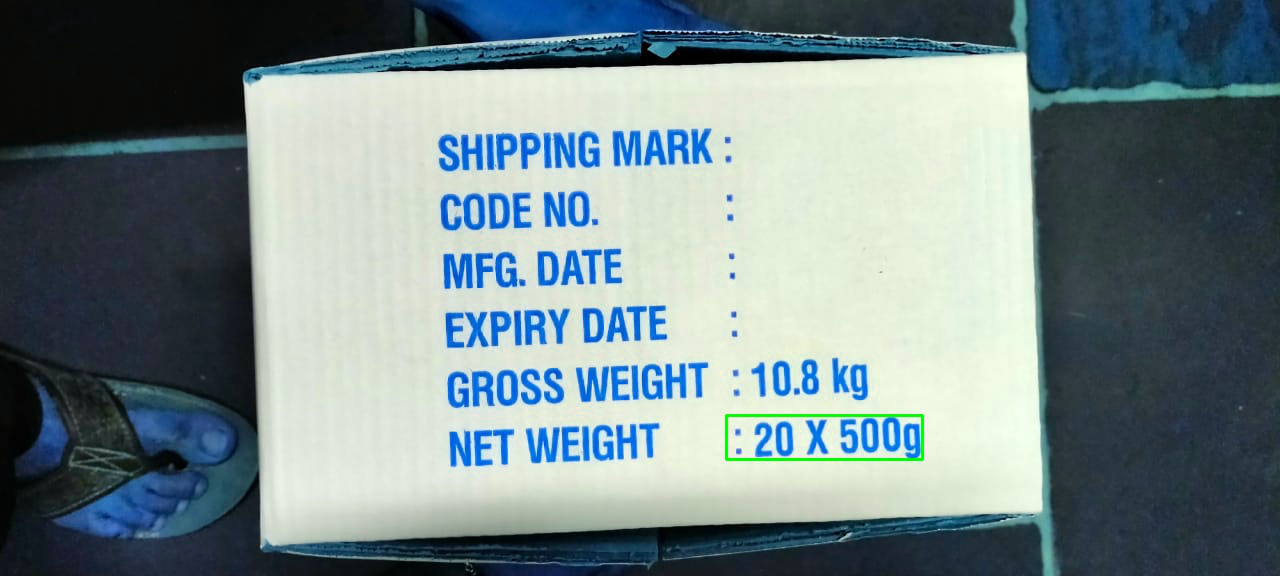

In [64]:
# Plot the bounding boxes on the image
#[726.0, 419.0], [921.0, 415.0], [922.0, 455.0], [727.0, 459.0]
import cv2
img1 = np.array(img)
cv2.rectangle(img1, (726, 415), (922, 459), (0, 255, 0), 2)

# Save the image
cv2.imwrite('image_with_boxes.jpg', img1)

bbox_img = load_image_with_orientation('image_with_boxes.jpg')
bbox_img.show()

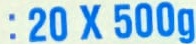

In [65]:
# Crop the image
cropped_image = np.array(img)[415:459, 726:922]

# Save the cropped image
cv2.imwrite('cropped_image.jpg', cropped_image)

cropped_img = load_image_with_orientation('cropped_image.jpg')
cropped_img.show()

In [66]:
t1 = datetime.now()
result = ocr.ocr('cropped_image.jpg')
t2 = datetime.now()
print(t2-t1)
words = []
for line in result:
    for word_info in line:
        words.append(word_info[1][0])
        print(word_info[1])
print(words)

[2023/07/20 11:40:09] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/07/20 11:40:09] ppocr DEBUG: dt_boxes num : 1, elapse : 0.01970505714416504
[2023/07/20 11:40:09] ppocr DEBUG: rec_res num  : 1, elapse : 0.06548929214477539
0:00:00.093219
('20X5000', 0.9414206743240356)
['20X5000']
